In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('../data/raw/Titanic3.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


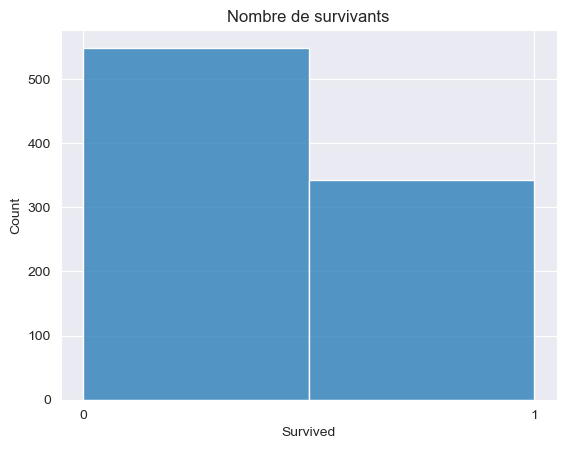

In [2]:
histo_survived = sns.histplot(df['Survived'], bins = 2)
histo_survived.set_xticks([0, 1])
histo_survived.set_title('Nombre de survivants')
plt.show()

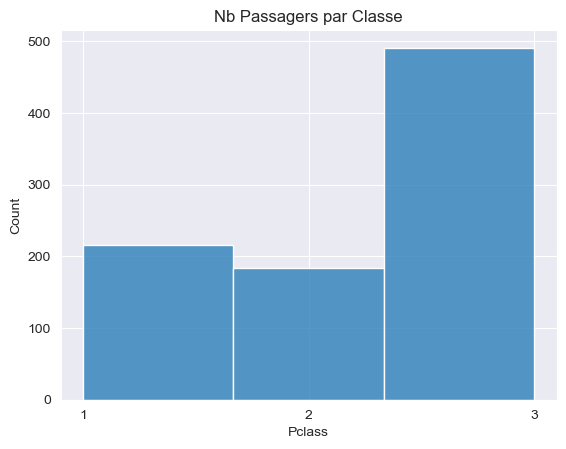

In [3]:
histo_pclass = sns.histplot(df['Pclass'], bins = 3)
histo_pclass.set_xticks([1, 2, 3])
histo_pclass.set_title('Nb Passagers par Classe')
plt.show()

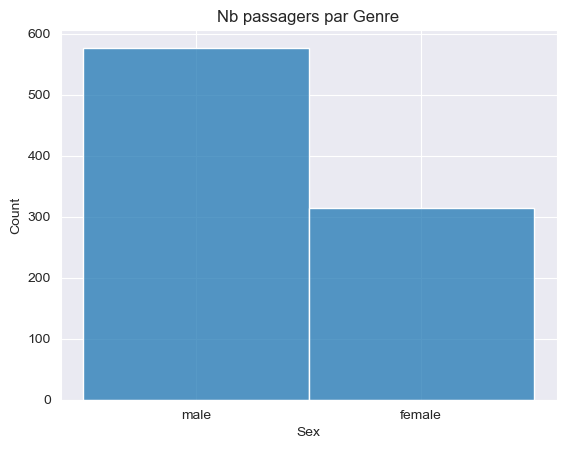

In [4]:
histo_genre = sns.histplot(df['Sex'], bins = 2)
histo_genre.set_title('Nb passagers par Genre')
plt.show()

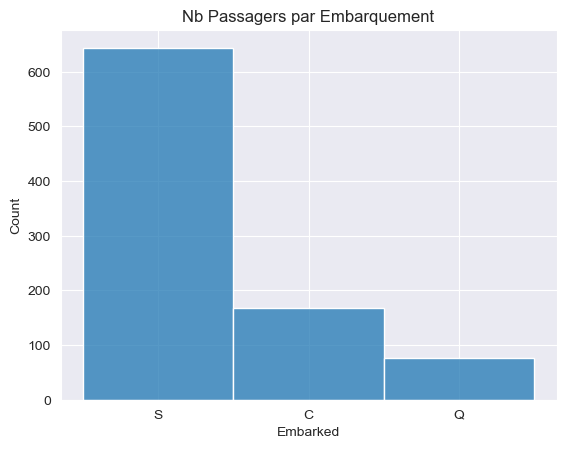

In [5]:
histo_embarked = sns.histplot(df['Embarked'])
histo_embarked.set_title('Nb Passagers par Embarquement')
plt.show()

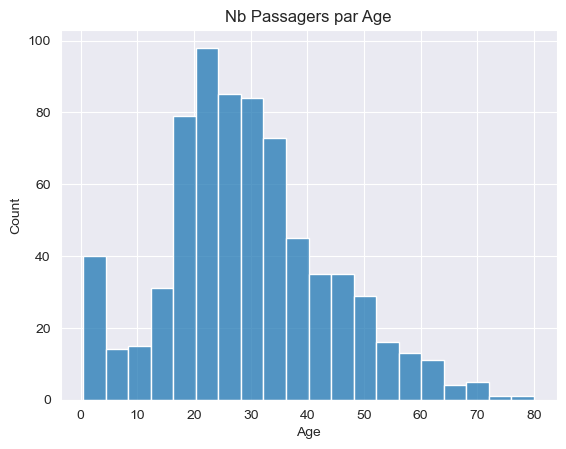

In [6]:
histo_age = sns.histplot(df['Age'])
histo_age.set_title('Nb Passagers par Age')
plt.show()

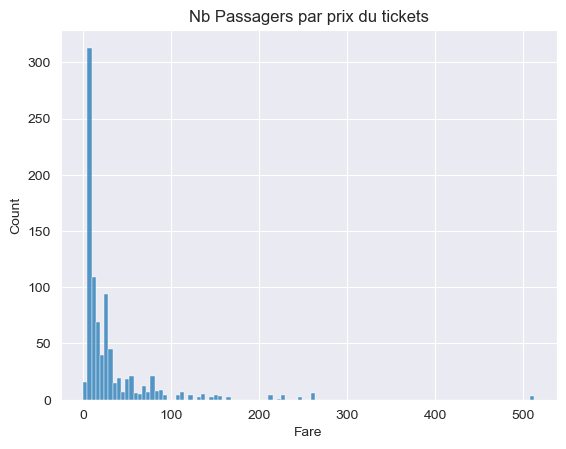

In [7]:
histo_fare = sns.histplot(df['Fare'])
histo_fare.set_title('Nb Passagers par prix du tickets')
plt.show()

In [8]:
# compter le nombre de colonnes nulles
df.isna().sum() # des ages sont nulles

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# mettre la moyenne d'age sur les cellules nulles de cette colonne
    # condition: quand ce n'est ni 0 ni Na avec .notna()
moyenne_age = df.loc[df['Age'].notna(), 'Age'].mean()
print(f"moyenne d'age de : {moyenne_age} ans") # 29.69911764705882
    # Convertir/arrondir en int car là c'est du float
moyenne_age = round(moyenne_age)
print(f"moyenne d'age arrondie de : {moyenne_age} ans") # 30

moyenne d'age de : 29.69911764705882 ans
moyenne d'age arrondie de : 30 ans


In [10]:
# Remplacer les datas vides par cette moyenne d'age
df_clean = df.copy()
df_clean['Age'] = df_clean['Age'].fillna(moyenne_age)

In [11]:
# vérifier:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# vérifier:
df_clean.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# se débarrasser des colonnes textuelles inutiles
# on peut supprimer le nom, l'identifiant des gens, le ticket, la cabine, le fare
df_clean.drop(['PassengerId', 'Name', 'Fare', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [14]:
# Numériser les colonnes textuelles restantes
# OneHotEncoder -> il extrait chaque valeur possibles de data dans des colonnes séparées
# ex: ['Sex_male' 'Embarked_C' 'Embarked_Q' 'Embarked_S' 'Embarked_nan']

# instancier un OneHotEncoder paramétrée pour lâcher la 1ère catégorie de chaque feature, si plus de 2, left intact
encoder = OneHotEncoder(drop = 'if_binary')
# il transforme dans de nouvelles colonnes en mémoire, pas encore un array
cols_encoded = encoder.fit_transform(df_clean[['Sex', 'Embarked']])
# on veut cette copie en array
cols_encoded_array = cols_encoded.toarray()
# on en veut un array numpy et pas python pur pour pouvoir l'insérer dans notre df
new_cols = np.array(cols_encoded_array)

In [15]:
labels = encoder.get_feature_names_out(['Sex', 'Embarked'])
print(labels) #['Sex_male' 'Embarked_C' 'Embarked_Q' 'Embarked_S' 'Embarked_nan']

['Sex_male' 'Embarked_C' 'Embarked_Q' 'Embarked_S' 'Embarked_nan']


In [16]:
# le mettre dans notre df
    # convertir nparray cols_encoded_array en dp
df_cols_encoded = pd.DataFrame(cols_encoded_array, columns=labels)
    # avec .join() pour fusionner plusieurs df
df_clean = df_clean.join(df_cols_encoded)
    # verifier que les inserts sont bons
df_clean.head(5) # on a les anciennes et les nouvelles colonnes
    # supprimer les colonnes non numériques maintenant
df_clean.drop(['Sex', 'Embarked'], axis=1, inplace=True)
    # verifier le résultat final
df_clean.head(5)
    # exporter ce nouveau df_clean en .csv avec index=false pour ne pas écrire les noms des lignes
df_clean.to_csv("../data/processed/titanic.clean.csv", index=False)